In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [18]:
movie_data=pd.read_csv('/content/ movie 2.csv')

# EDA (Exploratory Data Analysis)**bold text**

In [19]:
movie_data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [20]:
movie_data.shape

(40000, 2)

In [23]:
movie_data.duplicated().sum()

np.int64(277)

In [24]:
movie_data.drop_duplicates(inplace=True)

In [25]:
movie_data.duplicated().sum()

np.int64(0)

In [27]:
movie_data.isnull().sum()

,0
text,0
label,0


In [28]:
movie_data.nunique()

,0
text,39723
label,2


In [29]:
movie_data['label'].unique()

array([0, 1])

In [30]:
movie_data['label'].value_counts()

,count
label,
1,19908
0,19815


<Axes: xlabel='label', ylabel='count'>

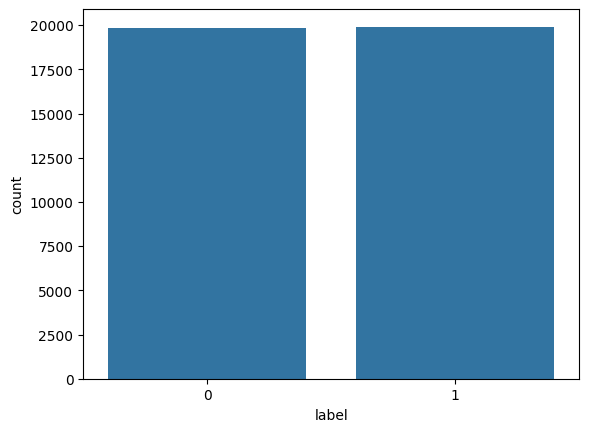

In [31]:
sns.countplot(data=movie_data,x='label')

In [33]:
movie_data['review_length']=movie_data['text'].apply(lambda x:len(x))

In [34]:
movie_data.head()

,text,label,review_length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983


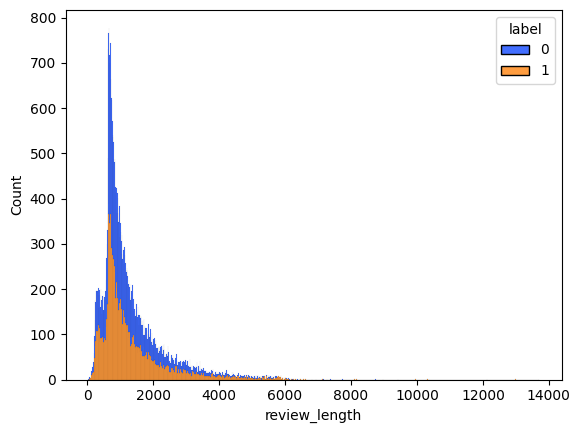

In [35]:
sns.histplot(data=movie_data,bins=1000,hue='label',x='review_length',palette='bright',multiple='stack')
plt.show()

# 2) Data Processing

In [36]:
movie_data['clean_text']=movie_data['text'].str.lower()

In [38]:
movie_data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,i grew up (b. 1965) watching and loving the th...
1,"When I put this movie in my DVD player, and sa...",0,1811,"when i put this movie in my dvd player, and sa..."
2,Why do people who do not know what a particula...,0,983,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,351,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im a die hard dads army fan and nothing will e...


In [39]:
import string

In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
def remove_punctuations(text):
  punctuations=string.punctuation
  return(text.translate(str.maketrans('','',punctuations)))
movie_data['clean_text']=movie_data['clean_text'].apply(lambda x:remove_punctuations(x))


In [43]:
movie_data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,i grew up b 1965 watching and loving the thund...
1,"When I put this movie in my DVD player, and sa...",0,1811,when i put this movie in my dvd player and sat...
2,Why do people who do not know what a particula...,0,983,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,351,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im a die hard dads army fan and nothing will e...


In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from nltk.corpus import stopwords

In [46]:
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
  return '  '.join([word for word in str(text).split() if word not in stop_words])

In [47]:
movie_data['clean_text']=movie_data['clean_text'].apply(lambda x:remove_stopwords(x))

In [48]:
movie_data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watching loving thunderbirds ...
1,"When I put this movie in my DVD player, and sa...",0,1811,put movie dvd player sat coke chips exp...
2,Why do people who do not know what a particula...,0,983,people know particular time past like fe...
3,Even though I have great interest in Biblical ...,0,351,even though great interest biblical movie...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dads army fan nothing ever ...


In [49]:
from collections import Counter
word_count=Counter()
for text in movie_data['clean_text']:
  for word in text.split():
    word_count[word]+=1
word_count.most_common(10)


[('br', 90466),
 ('movie', 66507),
 ('film', 59115),
 ('one', 40594),
 ('like', 31112),
 ('good', 22845),
 ('even', 19579),
 ('would', 19079),
 ('time', 18529),
 ('really', 18330)]

In [51]:
frequent_words=set(word for (word,count) in word_count.most_common(10))
def remove_frequent_words(text):
  return ' '.join([word for word in text.split() if word not in frequent_words])

In [52]:
movie_data['clean_text']=movie_data['clean_text'].apply(lambda x:remove_frequent_words(x))

In [53]:
rare_words=set(word for (word,count) in word_count.most_common(10)[:-10:-1])
def remove_rare_words(text):
  return ' '.join([word for word in text.split() if word not in rare_words])

In [54]:
movie_data['clean_text']=movie_data['clean_text'].apply(lambda x:remove_rare_words(x))

In [55]:
movie_data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watching loving thunderbirds mates...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chips expectations hop...
2,Why do people who do not know what a particula...,0,983,people know particular past feel need try defi...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblical movies bored de...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dads army fan nothing ever change ...


In [56]:
import re

In [57]:
def remove_spl_chs(text):
  return re.sub('[^a-zA-Z0-9]',' ',text)

In [58]:
movie_data['clean_text']=movie_data['clean_text'].apply(lambda x:remove_spl_chs(x))

In [60]:
movie_data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watching loving thunderbirds mates...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chips expectations hop...
2,Why do people who do not know what a particula...,0,983,people know particular past feel need try defi...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblical movies bored de...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dads army fan nothing ever change ...


In [61]:
import nltk
import spacy
import tensorflow as tf
import sklearn
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [62]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer=PorterStemmer()
def stem_text(text):
  tokens=word_tokenize(text)
  stemmed=[stemmer.stem(token) for token in tokens]
  return ' '.join(stemmed)

In [63]:
movie_data['clean_text']=movie_data['clean_text'].apply(lambda x:stem_text(x))

In [64]:
movie_data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watch love thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chip expect hope conta...
2,Why do people who do not know what a particula...,0,983,peopl know particular past feel need tri defin...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblic movi bore death e...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dad armi fan noth ever chang got t...


In [65]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lem_text(text):
  tokens=word_tokenize(text)
  lemmatized=[lemmatizer.lemmatize(token) for token in tokens]
  return ' '.join(lemmatized)

In [66]:
movie_data['clean_text']=movie_data['clean_text'].apply(lambda x:lem_text(x))

In [67]:
movie_data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watch love thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chip expect hope conta...
2,Why do people who do not know what a particula...,0,983,peopl know particular past feel need tri defin...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblic movi bore death e...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dad armi fan noth ever chang got t...


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(movie_data.clean_text,movie_data.label,test_size=0.2,random_state=42)

## 3) **Feature** Extraction

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

Naive_Bayes 0.8635619886721209 0.9371174292385485 0.8631658672052512


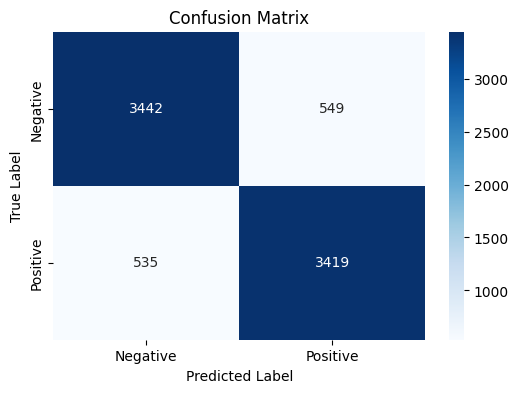

Logestic_regression: 0.8864694776589049 0.9552559901153418 0.8875311720698255


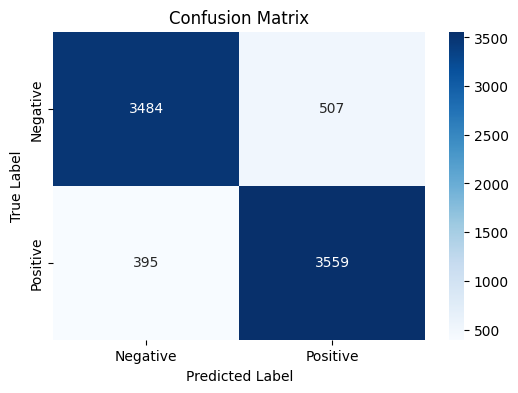

Random_Forest 0.8503461296412839 0.9266766385216509 0.8497409326424871


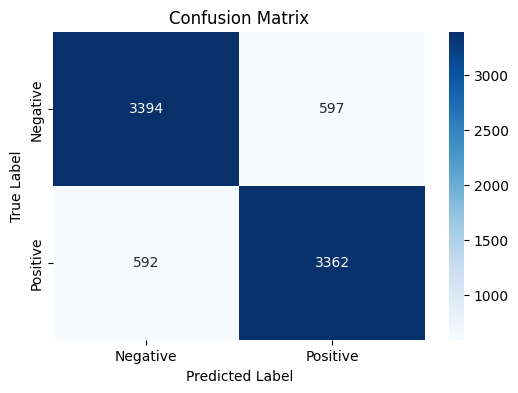

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

model=MultinomialNB()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
accuracy=accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)
confusion1=confusion_matrix(y_test,y_pred)
print('Naive_Bayes',accuracy,roc,f1)
plt.figure(figsize=(6,4))
sns.heatmap(confusion1, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


model=LogisticRegression()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
accuracy=accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)
confusion2=confusion_matrix(y_test,y_pred)
print('Logestic_regression:',accuracy,roc,f1)
plt.figure(figsize=(6,4))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


model=RandomForestClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
accuracy=accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)
confusion3=confusion_matrix(y_test,y_pred)
print('Random_Forest',accuracy,roc,f1)
plt.figure(figsize=(6,4))
sns.heatmap(confusion3, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create the model
model = Sequential()

# Input layer + First hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dropout(0.3))  # Dropout for regularization

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))


# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    X_train_tfidf, y_train,
    epochs=20,
    batch_size=3000,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.6688 - loss: 0.6874 - val_accuracy: 0.8420 - val_loss: 0.6511
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.8739 - loss: 0.6264 - val_accuracy: 0.8557 - val_loss: 0.5610
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.8973 - loss: 0.5132 - val_accuracy: 0.8650 - val_loss: 0.4469
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.9143 - loss: 0.3753 - val_accuracy: 0.8719 - val_loss: 0.3489
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - accuracy: 0.9339 - loss: 0.2552 - val_accuracy: 0.8826 - val_loss: 0.2909
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 51s 6s/step - accuracy: 0.9511 - loss: 0.1757 - val_accuracy: 0.8919 - val_loss: 0.2646
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - accuracy: 0.9649 - loss: 0.1267 - val_accuracy: 0.8936 - val_loss: 0.2567
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.9773 - loss: 0.0900 - val_accuracy: 0.8944 - val_loss: 0.2594
Epoch 9/

In [76]:
history=model.fit(X_train_tfidf,y_train,epochs=10,batch_size=3000)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.9963 - loss: 0.0188
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9986 - loss: 0.0120
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.9991 - loss: 0.0091
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9994 - loss: 0.0078
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9997 - loss: 0.0057
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9997 - loss: 0.0050
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9999 - loss: 0.0036
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9999 - loss: 0.0034
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 1.0000 - loss: 0.0027
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 1.0000 - loss: 0.0023
